# Finance Data Project 



In [1]:
import pandas_datareader.data as data
import pandas as pd
import numpy as np
%matplotlib inline
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import plotly
import cufflinks as cf
cf.go_offline()

**I. Collecting data**

In [3]:
# Bank of America
BAC = data.DataReader("BAC", 'stooq')

# CitiGroup
C = data.DataReader("C", 'stooq')

# Goldman Sachs
GS = data.DataReader("GS", 'stooq')

# JPMorgan Chase
JPM = data.DataReader("JPM", 'stooq')

# Morgan Stanley
MS = data.DataReader("MS", 'stooq')

# Wells Fargo
WFC = data.DataReader("WFC", 'stooq')

In [4]:
BAC

,Open,High,Low,Close,Volume
Date,,,,,
2024-03-21,36.9300,37.6000,36.8800,37.5100,4.321949e+07
2024-03-20,35.8400,36.8800,35.7300,36.7500,4.051896e+07
2024-03-19,35.8900,36.3900,35.8533,36.0300,4.611377e+07
2024-03-18,35.6600,36.0850,35.3900,36.0100,5.061786e+07
2024-03-15,35.2800,36.0100,35.2400,35.4100,6.964639e+07
...,...,...,...,...,...
2019-03-29,25.2813,25.4001,25.0514,25.3166,9.093613e+07
2019-03-28,24.9601,25.1516,24.7951,25.0790,4.998957e+07
2019-03-27,24.8590,25.1162,24.7253,24.8049,6.279358e+07


**II. Creating tickers**

In [5]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [6]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

In [7]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [8]:
bank_stocks

Bank Ticker      BAC                                                 C   
Stock Info      Open     High      Low    Close        Volume     Open   
Date                                                                     
2024-03-21   36.9300  37.6000  36.8800  37.5100  4.321949e+07  60.3100  \
2024-03-20   35.8400  36.8800  35.7300  36.7500  4.051896e+07  58.4900   
2024-03-19   35.8900  36.3900  35.8533  36.0300  4.611377e+07  58.5900   
2024-03-18   35.6600  36.0850  35.3900  36.0100  5.061786e+07  57.8500   
2024-03-15   35.2800  36.0100  35.2400  35.4100  6.964639e+07  56.4500   
...              ...      ...      ...      ...           ...      ...   
2019-03-29   25.2813  25.4001  25.0514  25.3166  9.093613e+07  54.7268   
2019-03-28   24.9601  25.1516  24.7951  25.0790  4.998957e+07  53.5149   
2019-03-27   24.8590  25.1162  24.7253  24.8049  6.279358e+07  53.8927   
2019-03-26   24.9139  25.0986  24.6684  24.9679  6.525293e+07  53.5511   
2019-03-25   24.6930  25.1251  24.4170  24.6292  7.145311e+07  53.5433   

Bank Ticker                                           ...       MS            
Stock Info      High      Low    Close        Volume  ...     Open     High   
Date                                                  ...                     
2024-03-21   61.5450  60.3100  61.3300  1.789206e+07  ...  91.9600  94.3600  \
2024-03-20   60.3400  58.4600  60.1300  2.026992e+07  ...  88.0500  91.4820   
2024-03-19   59.3200  58.5400  58.8600  1.345532e+07  ...  88.0000  89.0900   
2024-03-18   58.6550  57.5600  58.6300  1.399464e+07  ...  88.3600  88.7000   
2024-03-15   57.7500  56.4500  57.6100  2.616426e+07  ...  88.4800  89.3461   
...              ...      ...      ...           ...  ...      ...      ...   
2019-03-29   55.1477  54.4027  54.6319  1.526867e+07  ...  38.0811  38.2145   
2019-03-28   54.4370  53.4013  54.4194  1.375930e+07  ...  37.1912  37.6219   
2019-03-27   54.1385  53.3152  53.3250  1.863232e+07  ...  37.4866  37.6965   
2019-03-26   53.8673  53.1469  53.7518  1.678804e+07  ...  37.3894  37.8565   
2019-03-25   54.1385  52.7259  52.9726  2.380266e+07  ...  37.3894  37.5857   

Bank Ticker                                      WFC                     
Stock Info       Low    Close        Volume     Open     High      Low   
Date                                                                     
2024-03-21   91.9550  93.4000  1.365994e+07  57.5900  58.1150  57.4500  \
2024-03-20   87.9107  91.3500  1.081172e+07  56.6200  57.5100  56.2800   
2024-03-19   87.8600  88.4200  8.546529e+06  57.6450  57.9400  56.9200   
2024-03-18   87.7000  87.9600  5.959969e+06  57.6000  57.8300  57.1100   
2024-03-15   88.1700  88.3800  2.036304e+07  56.8600  58.3000  56.8600   
...              ...      ...           ...      ...      ...      ...   
2019-03-29   37.6181  37.8299  1.317612e+07  44.7686  44.7686  42.9687   
2019-03-28   37.0942  37.5857  9.367260e+06  43.8075  44.2417  43.4660   
2019-03-27   37.0136  37.0844  1.255171e+07  43.9949  44.2189  43.5588   
2019-03-26   37.0540  37.5425  1.072645e+07  43.6180  44.0867  43.5203   
2019-03-25   36.6713  36.9784  1.618000e+07  43.5272  43.9505  43.0160   

Bank Ticker                         
Stock Info     Close        Volume  
Date                                
2024-03-21   57.8500  1.814170e+07  
2024-03-20   57.3000  2.284155e+07  
2024-03-19   57.0100  1.450476e+07  
2024-03-18   57.7700  1.637655e+07  
2024-03-15   57.5100  4.078280e+07  
...              ...           ...  
2019-03-29   43.4363  5.961337e+07  
2019-03-28   44.1331  1.766639e+07  
2019-03-27   43.8429  1.881263e+07  
2019-03-26   44.0590  1.889894e+07  
2019-03-25   43.2252  1.916360e+07  

[1258 rows x 30 columns]

_____
# EDA



In [9]:
bank_stocks.xs(key ="Close", axis= 1, level="Stock Info").max()

Bank Ticker
BAC     48.2567
C       75.6568
GS     413.7100
JPM    199.0600
MS     105.7610
WFC     57.9642
dtype: float64

In [24]:
df_return = pd.DataFrame()

In [29]:
for tick in tickers:
    df_return[tick+' Return'] = bank_stocks[tick]['Close']
df = df_return.sort_index(ascending= True)
df1 = df.pct_change()

In [35]:
df1.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2019-03-25,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-26,0.013752,0.014709,0.011593,0.010008,0.015255,0.019290
2019-03-27,-0.006528,-0.007940,-0.003410,-0.003406,-0.012202,-0.004905
2019-03-28,0.011050,0.020523,0.006001,0.011414,0.013518,0.006619
2019-03-29,0.009474,0.003905,0.004231,0.005063,0.006497,-0.015789


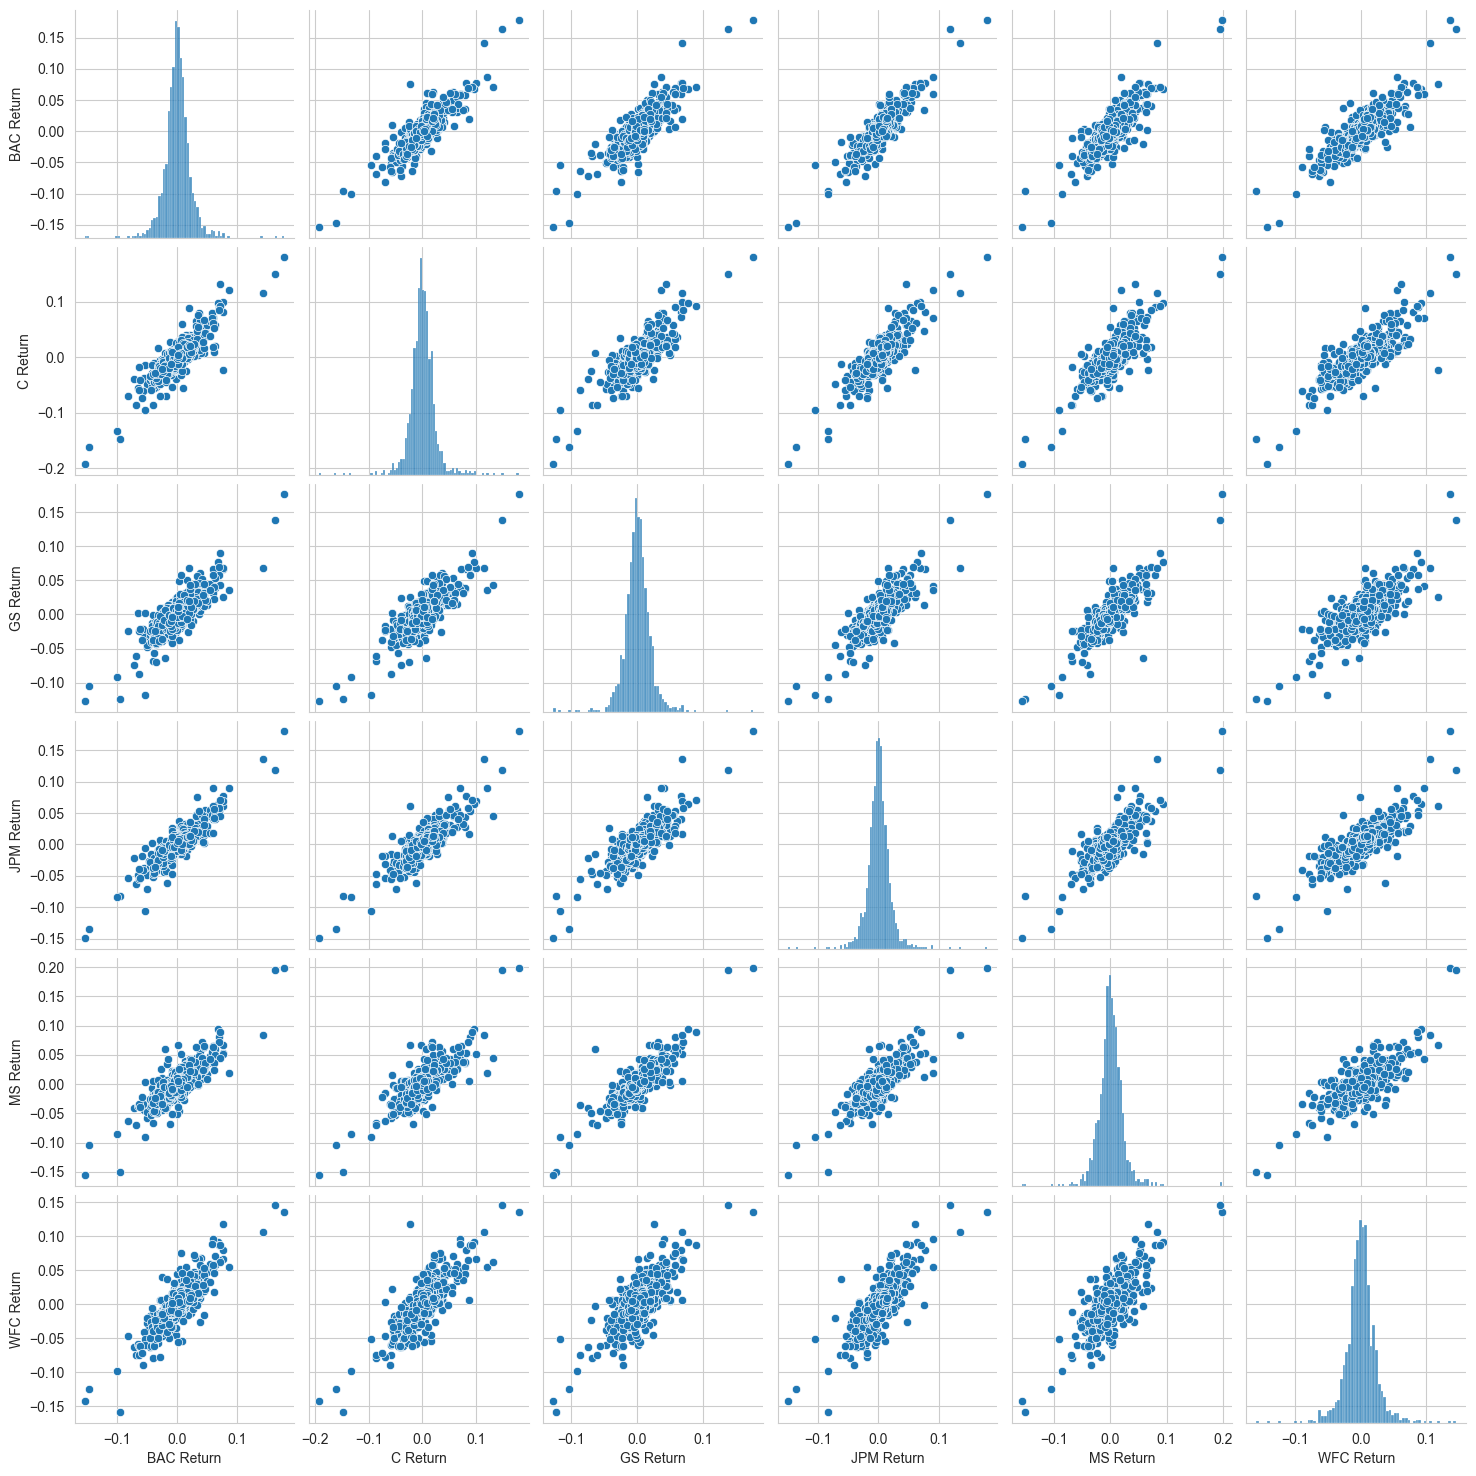

In [30]:
import seaborn as sns
sns.pairplot(df1[1:])

In [54]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

**Best and worst return day**
 

In [32]:
df1.idxmin()

BAC Return   2020-03-16
C Return     2020-03-16
GS Return    2020-03-16
JPM Return   2020-03-16
MS Return    2020-03-16
WFC Return   2020-03-12
dtype: datetime64[ns]

In [36]:
df1.idxmax()

BAC Return   2020-03-13
C Return     2020-03-13
GS Return    2020-03-13
JPM Return   2020-03-13
MS Return    2020-03-13
WFC Return   2020-03-24
dtype: datetime64[ns]

**Standard deviation of the returns**

In [39]:
df1.std()

BAC Return    0.022456
C Return      0.024450
GS Return     0.020462
JPM Return    0.020044
MS Return     0.022207
WFC Return    0.024025
dtype: float64

In [42]:
df1.loc["2020-01-01":"2021-01-01"].std()

BAC Return    0.036937
C Return      0.042417
GS Return     0.032898
JPM Return    0.034237
MS Return     0.036174
WFC Return    0.038571
dtype: float64

**Create a distplot using seaborn of the returns for Morgan Stanley**

/var/folders/bh/btn296b95gqdv7y03b_99b300000gn/T/ipykernel_16223/901511154.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='GS Return', ylabel='Density'>

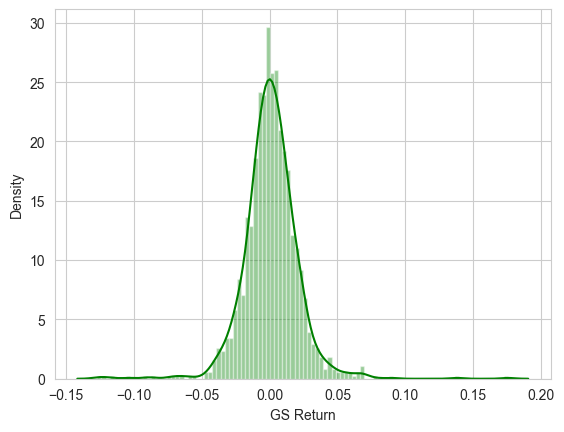

In [58]:
sns.distplot(df1['GS Return'],color='green',bins=100)

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

/var/folders/bh/btn296b95gqdv7y03b_99b300000gn/T/ipykernel_16223/3339590703.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='C Return', ylabel='Density'>

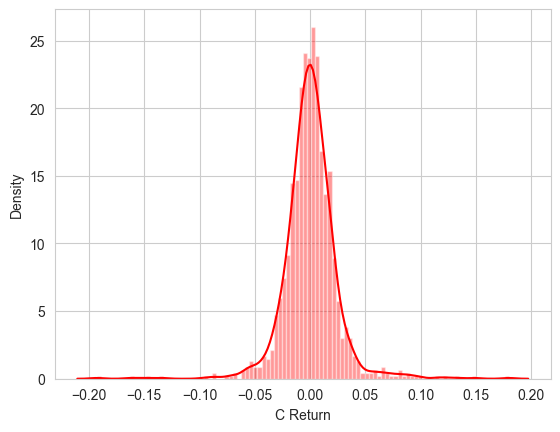

In [55]:
sns.distplot(df1['C Return'],color='red',bins=100)